In [4]:
conda install -c conda-forge geopandas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\TARUN\Anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.72.0           |       h0caebb8_0        32.2 MB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.5.0                |             py_0           8 KB  conda-forge
    expat-2.2.9                |       he025d50_2         116 KB  conda-forge
    fiona-1.8.4                |py37h0d92105_1001         916 KB  conda-forge
    freexl-1.0.5               |    hd288d7e_1002          56 KB  conda-forge
    gdal-2.3.

boost-cpp-1.72.0     | 32.2 MB   | 7          |   7% 
boost-cpp-1.72.0     | 32.2 MB   | 8          |   8% 
boost-cpp-1.72.0     | 32.2 MB   | 8          |   8% 
boost-cpp-1.72.0     | 32.2 MB   | 8          |   9% 
boost-cpp-1.72.0     | 32.2 MB   | 9          |   9% 
boost-cpp-1.72.0     | 32.2 MB   | 9          |  10% 
boost-cpp-1.72.0     | 32.2 MB   | #          |  11% 
boost-cpp-1.72.0     | 32.2 MB   | #1         |  11% 
boost-cpp-1.72.0     | 32.2 MB   | #1         |  12% 
boost-cpp-1.72.0     | 32.2 MB   | #1         |  12% 
boost-cpp-1.72.0     | 32.2 MB   | #2         |  12% 
boost-cpp-1.72.0     | 32.2 MB   | #3         |  13% 
boost-cpp-1.72.0     | 32.2 MB   | #3         |  13% 
boost-cpp-1.72.0     | 32.2 MB   | #3         |  14% 
boost-cpp-1.72.0     | 32.2 MB   | #4         |  14% 
boost-cpp-1.72.0     | 32.2 MB   | #5         |  15% 
boost-cpp-1.72.0     | 32.2 MB   | #5         |  15% 
boost-cpp-1.72.0     | 32.2 MB   | #5         |  16% 
boost-cpp-1.72.0     | 32.2 

boost-cpp-1.72.0     | 32.2 MB   | #########7 |  97% 
boost-cpp-1.72.0     | 32.2 MB   | #########8 |  98% 
boost-cpp-1.72.0     | 32.2 MB   | #########8 |  99% 
boost-cpp-1.72.0     | 32.2 MB   | #########8 |  99% 
boost-cpp-1.72.0     | 32.2 MB   | #########9 |  99% 
boost-cpp-1.72.0     | 32.2 MB   | #########9 | 100% 
boost-cpp-1.72.0     | 32.2 MB   | ########## | 100% 

libspatialite-4.3.0a | 4.3 MB    |            |   0% 
libspatialite-4.3.0a | 4.3 MB    |            |   0% 
libspatialite-4.3.0a | 4.3 MB    | 2          |   3% 
libspatialite-4.3.0a | 4.3 MB    | 4          |   5% 
libspatialite-4.3.0a | 4.3 MB    | 6          |   7% 
libspatialite-4.3.0a | 4.3 MB    | 8          |   9% 
libspatialite-4.3.0a | 4.3 MB    | #          |  10% 
libspatialite-4.3.0a | 4.3 MB    | #2         |  12% 
libspatialite-4.3.0a | 4.3 MB    | #3         |  14% 
libspatialite-4.3.0a | 4.3 MB    | #9         |  20% 
libspatialite-4.3.0a | 4.3 MB    | ##5        |  25% 
libspatialite-4.3.0a | 4.3 


Note: you may need to restart the kernel to use updated packages.


+-------+-----------+-----------+-----------+----------+
| Sr.No | States/UT | Confirmed | Recovered | Deceased |
+-------+-----------+-----------+-----------+----------+
|       |   Total   |     0     |     0     |    0     |
+-------+-----------+-----------+-----------+----------+


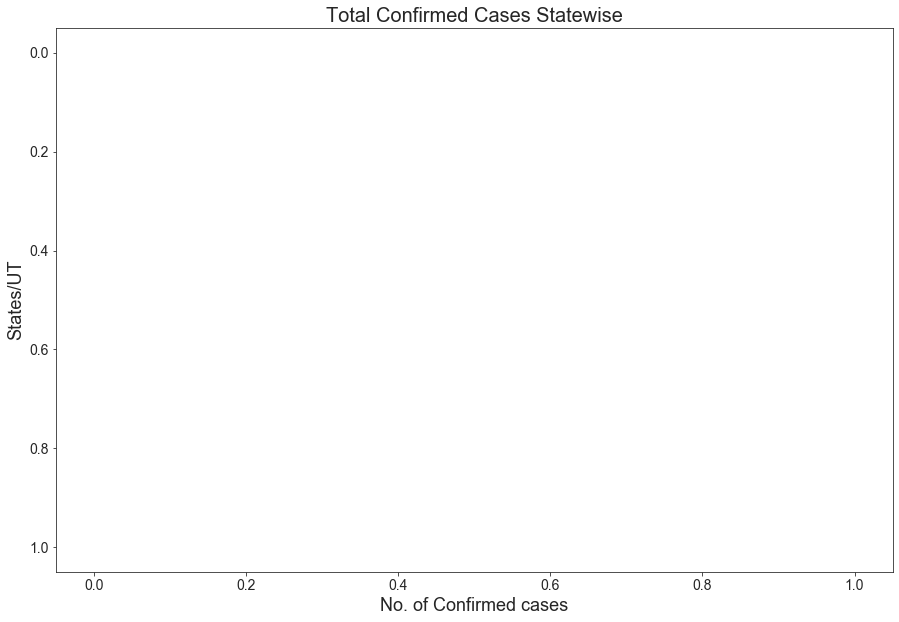

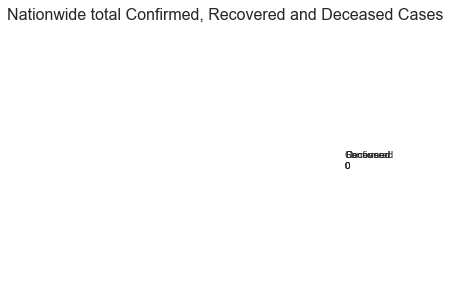

DriverError: Indian_States.shp: No such file or directory

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()


In [2]:
https://www.mohfw.gov.in/

SyntaxError: invalid syntax (<ipython-input-2-dab6c05ba07d>, line 1)

In [5]:
import geopandas as gpd